In [1]:
#Ignore unimportant warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [3]:
#Read the data in pandas
bike= pd.read_csv("C:\\Users\\admin\\Downloads\\day.csv")


In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.shape

(730, 16)

In [8]:
#checking if there is duplicates
bike = bike.drop_duplicates()

In [9]:
#no duplicates were there as the shape remains same.
bike.shape



(730, 16)

In [10]:
#As part of Data Preparation

#-We will remove the variables instant , dteday , casual and registered.
#Instant just shows the index number of the dataset which is not necessary
#Casual and Registered is similar to our Target variable CNT which has the total number of users.
#dteday data is kindoff mentioned in season,year,month,holiday,weekday and dteday is not int type.


bike = bike.drop(labels=["instant","dteday","casual","registered"],axis=1)
bike.shape

(730, 12)

In [11]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
#Now weekday,mnth,weathersit,season are categorical variables repesented as numbers so we will
#change them to categorical values



bike["season"] = bike["season"].replace({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})

bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 74.1+ KB


In [13]:
bike["weekday"] = bike["weekday"].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
bike.head(12)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,Spring,0,1,0,Saturday,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,Spring,0,1,0,Sunday,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,Spring,0,1,0,Monday,1,2,6.765000,8.11270,53.5833,17.875868,959
8,Spring,0,1,0,Tuesday,1,1,5.671653,5.80875,43.4167,24.250650,822
9,Spring,0,1,0,Wednesday,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [14]:


bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
bike["weathersit"] = bike["weathersit"].replace({1:"Clear",2:"Mist_Cloud",3:"L_Snow_Rain",4:"H_Snow_Rain"})

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,Monday,1,Mist_Cloud,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,Tuesday,1,Mist_Cloud,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


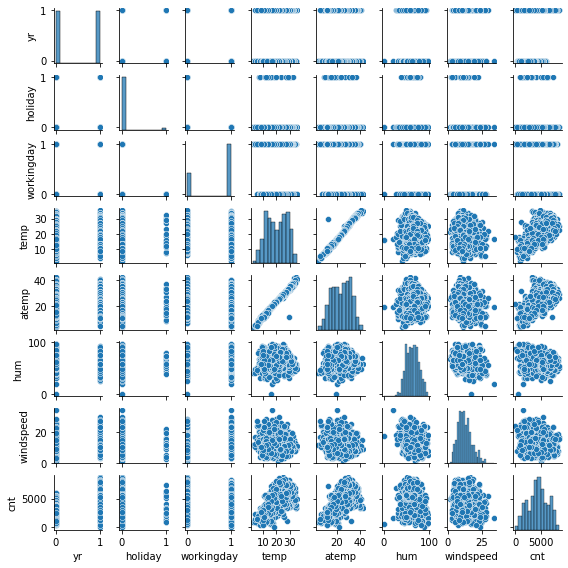

In [16]:
#Visualizing the numeric variable and we can see that there is some linearity in the variables with
#target variable

sns.pairplot(bike,height=1)
plt.show()

In [17]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


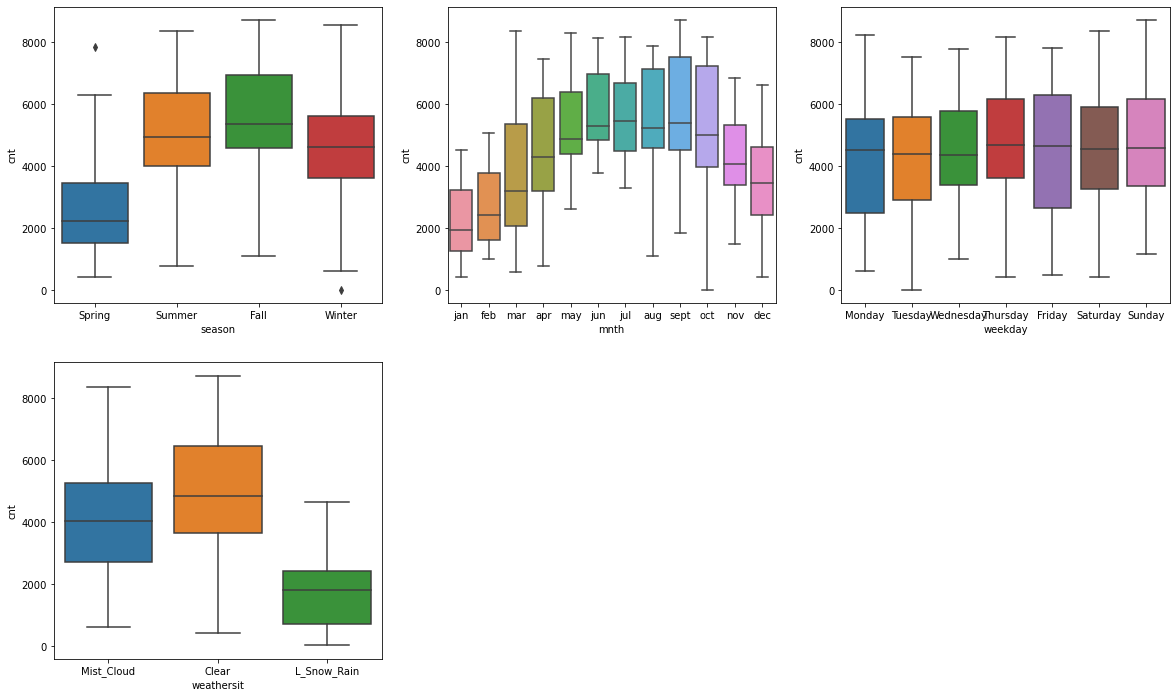

In [18]:
#Visualizing the categorical variables



plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x="season",y="cnt",data=bike)
plt.subplot(2,3,2)
sns.boxplot(x="mnth",y="cnt",data=bike)
plt.subplot(2,3,3)
sns.boxplot(x="weekday",y="cnt",data=bike)
plt.subplot(2,3,4)
sns.boxplot(x="weathersit",y="cnt",data=bike)
plt.show()

#There is some outliers season Spring and Winter,in weekdays the mean is more over similar likewise we get to see some
#beautifulpresentation of the data

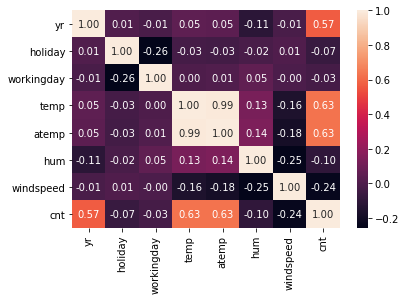

In [19]:
#We will check the correlation between these variables
ax = bike.corr()
sns.heatmap(ax,annot=True,fmt=".2f")
plt.show()


#We could see that temp and atemp is highly correlated hence we are going to drop atemo as it is derived from temp as it could effect our analysis.


In [20]:
#Dropping highly correlated independent variables
bike = bike.drop(labels=["atemp"],axis=1)
bike.shape

(730, 11)

In [21]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,jan,0,Monday,1,Mist_Cloud,14.110847,80.5833,10.749882,985
1,Spring,0,jan,0,Tuesday,1,Mist_Cloud,14.902598,69.6087,16.652113,801
2,Spring,0,jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


In [22]:
#Creating dummy variables

bike = pd.get_dummies(bike, drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   hum                     730 non-null    float64
 5   windspeed               730 non-null    float64
 6   cnt                     730 non-null    int64  
 7   season_Spring           730 non-null    uint8  
 8   season_Summer           730 non-null    uint8  
 9   season_Winter           730 non-null    uint8  
 10  mnth_aug                730 non-null    uint8  
 11  mnth_dec                730 non-null    uint8  
 12  mnth_feb                730 non-null    uint8  
 13  mnth_jan                730 non-null    uint8  
 14  mnth_jul                730 non-null    ui

In [23]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_L_Snow_Rain,weathersit_Mist_Cloud
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
bike.shape

(730, 29)

In [25]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_L_Snow_Rain',
       'weathersit_Mist_Cloud'],
      dtype='object')

In [26]:
#Spliting the dataset to train and test set

bike_train,bike_test = train_test_split(bike,train_size=0.7,random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [27]:
#Rescaling the features - continuos variables

numvars = ["temp","hum","windspeed","cnt"]

#Scaler object
scaler = MinMaxScaler()

#FitandTransform traing set

bike_train[numvars] = scaler.fit_transform(bike_train[numvars])


In [28]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_L_Snow_Rain,weathersit_Mist_Cloud
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_L_Snow_Rain,weathersit_Mist_Cloud
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [30]:
#Building a model using RFE approach
#Dividing into X and Y sets for the model building

y_train = bike_train.pop('cnt')
X_train = bike_train



In [31]:
#Linear regression object for model

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [32]:
#Bringing down number of features to 15 using RFE
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [33]:
#Columns selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 8),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 10),
 ('weathersit_L_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloud', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weathersit_L_Snow_Rain',
       'weathersit_Mist_Cloud'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_] #tfe not selected columns

Index(['workingday', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

Model 1

In [37]:
import statsmodels.api as sm

#Adding constant variable
X_train_sm = sm.add_constant(X_train_rfe)


lm1 = sm.OLS(y_train,X_train_sm).fit()


In [38]:
lm1.params

const                     0.319667
yr                        0.230404
holiday                  -0.091089
temp                      0.481503
hum                      -0.162213
windspeed                -0.188726
season_Spring            -0.061255
season_Summer             0.042337
season_Winter             0.101921
mnth_dec                 -0.035461
mnth_jan                 -0.043411
mnth_jul                 -0.055250
mnth_nov                 -0.038701
mnth_sept                 0.075467
weathersit_L_Snow_Rain   -0.246481
weathersit_Mist_Cloud    -0.054300
dtype: float64

In [39]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          8.15e-189
Time:                        20:17:00   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.3197      0.036      8.859      0.000       0.249       0.391
yr                         0.2304      0.008     28.487      0.000       0.215       0.246
holiday                   -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                       0.4815      0.037     13.005      0.000       0.409       0.554
hum                       -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                 -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_Spring             -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_Summer              0.0423      0.015      2.761      0.006       0.012       0.072
season_Winter              0.1019      0.018      5.656      0.000       0.067       0.137
mnth_dec                  -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_jan                  -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_jul                  -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_nov                  -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_sept                  0.0755      0.017      4.466      0.000       0.042       0.109
weathersit_L_Snow_Rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weathersit_Mist_Cloud     -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
#Checking VIF values

vif =pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,season_Spring,4.37
7,season_Winter,4.06
6,season_Summer,2.82
14,weathersit_Mist_Cloud,2.32
0,yr,2.09
11,mnth_nov,1.85
9,mnth_jan,1.75


hum  is having high VIF and low P value we need to remove that as it is insignificant

In [41]:
X_train_rfe = X_train_sm.drop(["hum"],axis=1)

In [42]:
#Adding constant variable
X_train_sm = sm.add_constant(X_train_rfe)


lm2 = sm.OLS(y_train,X_train_sm).fit()

lm2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          4.75e-186
Time:                        20:17:00   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2450      0.032      7.618      0.000       0.182       0.308
yr                         0.2345      0.008     28.687      0.000       0.218       0.251
holiday                   -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                       0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                 -0.1585      0.025     -6.276      0.000      -0.208      -0.109
season_Spring             -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_Summer              0.0349      0.015      2.251      0.025       0.004       0.065
season_Winter              0.0869      0.018      4.831      0.000       0.052       0.122
mnth_dec                  -0.0428      0.018     -2.413      0.016      -0.078      -0.008
mnth_jan                  -0.0500      0.018     -2.719      0.007      -0.086      -0.014
mnth_jul                  -0.0500      0.019     -2.703      0.007      -0.086      -0.014
mnth_nov                  -0.0395      0.019     -2.064      0.040      -0.077      -0.002
mnth_sept                  0.0687      0.017      4.015      0.000       0.035       0.102
weathersit_L_Snow_Rain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
weathersit_Mist_Cloud     -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 2

In [43]:
#Checking VIF values

vif =pd.DataFrame()
vif["Features"] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.35
5,season_Spring,5.21
3,temp,4.10
7,season_Winter,3.68
6,season_Summer,2.74
11,mnth_nov,1.77
9,mnth_jan,1.67
8,mnth_dec,1.49
10,mnth_jul,1.48
12,mnth_sept,1.33


season_Spring is having high P value and low VIF so we should dropthat also

Model 3

In [44]:
X_train_rfe = X_train_sm.drop(["season_Spring"],axis=1)

X_train_sm = sm.add_constant(X_train_rfe)


lm3 = sm.OLS(y_train,X_train_sm).fit()

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.9
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          7.45e-185
Time:                        20:17:01   Log-Likelihood:                 499.26
No. Observations:                 510   AIC:                            -970.5
Df Residuals:                     496   BIC:                            -911.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1638      0.021      7.783      0.000       0.122       0.205
yr                         0.2332      0.008     28.279      0.000       0.217       0.249
holiday                   -0.0959      0.026     -3.649      0.000      -0.148      -0.044
temp                       0.5215      0.027     19.632      0.000       0.469       0.574
windspeed                 -0.1658      0.025     -6.524      0.000      -0.216      -0.116
season_Summer              0.0703      0.011      6.193      0.000       0.048       0.093
season_Winter              0.1268      0.013      9.390      0.000       0.100       0.153
mnth_dec                  -0.0364      0.018     -2.044      0.041      -0.071      -0.001
mnth_jan                  -0.0550      0.019     -2.974      0.003      -0.091      -0.019
mnth_jul                  -0.0378      0.018     -2.063      0.040      -0.074      -0.002
mnth_nov                  -0.0280      0.019     -1.472      0.142      -0.065       0.009
mnth_sept                  0.0856      0.017      5.188      0.000       0.053       0.118
weathersit_L_Snow_Rain    -0.2883      0.025    -11.594      0.000      -0.337      -0.239
weathersit_Mist_Cloud     -0.0789      0.009     -8.984      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       58.410   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.490
Skew:                          -0.647   Prob(JB):                     2.52e-27
Kurtosis:                       5.022   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Checking VIF values

vif =pd.DataFrame()
vif["Features"] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.59
3,temp,2.16
6,season_Winter,2.03
10,mnth_nov,1.71
8,mnth_jan,1.65
7,mnth_dec,1.47
5,season_Summer,1.44
9,mnth_jul,1.42
11,mnth_sept,1.21
4,windspeed,1.11


mnth_nov is having high Pvalue and low VIFso we will remove that also

Model 4

In [46]:
X_train_rfe = X_train_sm.drop(["mnth_nov"],axis=1)

X_train_sm = sm.add_constant(X_train_rfe)


lm4 = sm.OLS(y_train,X_train_sm).fit()

lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.48e-185
Time:                        20:17:01   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     497   BIC:                            -915.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1583      0.021      7.634      0.000       0.118       0.199
yr                         0.2331      0.008     28.243      0.000       0.217       0.249
holiday                   -0.1003      0.026     -3.835      0.000      -0.152      -0.049
temp                       0.5289      0.026     20.245      0.000       0.478       0.580
windspeed                 -0.1658      0.025     -6.518      0.000      -0.216      -0.116
season_Summer              0.0714      0.011      6.294      0.000       0.049       0.094
season_Winter              0.1165      0.012     10.057      0.000       0.094       0.139
mnth_dec                  -0.0263      0.016     -1.598      0.111      -0.059       0.006
mnth_jan                  -0.0511      0.018     -2.785      0.006      -0.087      -0.015
mnth_jul                  -0.0387      0.018     -2.111      0.035      -0.075      -0.003
mnth_sept                  0.0882      0.016      5.371      0.000       0.056       0.121
weathersit_L_Snow_Rain    -0.2857      0.025    -11.505      0.000      -0.335      -0.237
weathersit_Mist_Cloud     -0.0785      0.009     -8.927      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       54.999   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.307
Skew:                          -0.625   Prob(JB):                     6.76e-25
Kurtosis:                       4.918   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Checking VIF values

vif =pd.DataFrame()
vif["Features"] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,25.74
3,temp,2.08
8,mnth_jan,1.62
6,season_Winter,1.50
5,season_Summer,1.43
9,mnth_jul,1.42
7,mnth_dec,1.25
10,mnth_sept,1.19
4,windspeed,1.11
11,weathersit_L_Snow_Rain,1.05


Model 5

In [48]:
X_train_rfe = X_train_sm.drop(["mnth_dec"],axis=1)

X_train_sm = sm.add_constant(X_train_rfe)


lm5 = sm.OLS(y_train,X_train_sm).fit()

lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.5
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.40e-186
Time:                        20:17:01   Log-Likelihood:                 496.84
No. Observations:                 510   AIC:                            -969.7
Df Residuals:                     498   BIC:                            -918.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1478      0.020      7.502      0.000       0.109       0.187
yr                         0.2332      0.008     28.203      0.000       0.217       0.249
holiday                   -0.0989      0.026     -3.778      0.000      -0.150      -0.047
temp                       0.5404      0.025     21.481      0.000       0.491       0.590
windspeed                 -0.1615      0.025     -6.375      0.000      -0.211      -0.112
season_Summer              0.0735      0.011      6.516      0.000       0.051       0.096
season_Winter              0.1140      0.011      9.916      0.000       0.091       0.137
mnth_jan                  -0.0445      0.018     -2.488      0.013      -0.080      -0.009
mnth_jul                  -0.0394      0.018     -2.145      0.032      -0.075      -0.003
mnth_sept                  0.0900      0.016      5.480      0.000       0.058       0.122
weathersit_L_Snow_Rain    -0.2835      0.025    -11.417      0.000      -0.332      -0.235
weathersit_Mist_Cloud     -0.0785      0.009     -8.911      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       52.948   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.196
Skew:                          -0.610   Prob(JB):                     1.44e-23
Kurtosis:                       4.861   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Checking VIF values

vif =pd.DataFrame()
vif["Features"] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.18
3,temp,1.92
7,mnth_jan,1.54
6,season_Winter,1.47
8,mnth_jul,1.42
5,season_Summer,1.41
9,mnth_sept,1.19
4,windspeed,1.10
10,weathersit_L_Snow_Rain,1.05
11,weathersit_Mist_Cloud,1.05


This model seems fine without  much multicolinearity

Residual Analysis

Text(0.5, 0, 'Errors')

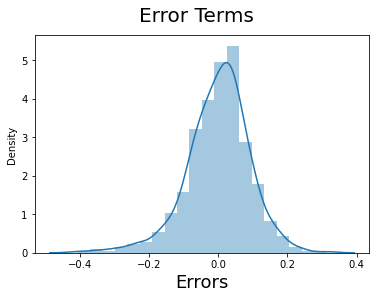

In [50]:
y_train_pred = lm5.predict(X_train_sm)

res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

Residuals are normally distributed

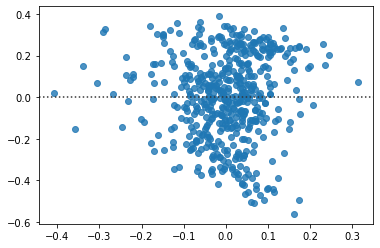

In [66]:
#Validating the Homoscedasticity
sns.residplot(res,y_train_pred)
plt.show()

Prediction on the Final Model

In [51]:
#We have to scale the same variables in Test dataset

#Rescaling the features - continuos variables

numvars = ["temp","hum","windspeed","cnt"]

#Scaler object
scaler = MinMaxScaler()

#FitandTransform traing set

bike_test[numvars] = scaler.fit_transform(bike_test[numvars])


In [52]:
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_oct,mnth_sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_L_Snow_Rain,weathersit_Mist_Cloud
184,0,1,0,0.837241,0.534223,0.149393,0.704300,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.470417,0.231142,0.725421,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.777843,0.443398,0.278853,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.236659,0.449707,0.545512,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.070765,0.682387,0.569148,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [53]:
#Dividing into xtest and ytest

y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      220 non-null    int64  
 1   holiday                 220 non-null    int64  
 2   workingday              220 non-null    int64  
 3   temp                    220 non-null    float64
 4   hum                     220 non-null    float64
 5   windspeed               220 non-null    float64
 6   season_Spring           220 non-null    uint8  
 7   season_Summer           220 non-null    uint8  
 8   season_Winter           220 non-null    uint8  
 9   mnth_aug                220 non-null    uint8  
 10  mnth_dec                220 non-null    uint8  
 11  mnth_feb                220 non-null    uint8  
 12  mnth_jan                220 non-null    uint8  
 13  mnth_jul                220 non-null    uint8  
 14  mnth_jun                220 non-null    

In [54]:
#Using same variables as the last model

col1 = X_train_rfe.drop(["const"],axis=1).columns

X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)
X_test_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   220 non-null    float64
 1   yr                      220 non-null    int64  
 2   holiday                 220 non-null    int64  
 3   temp                    220 non-null    float64
 4   windspeed               220 non-null    float64
 5   season_Summer           220 non-null    uint8  
 6   season_Winter           220 non-null    uint8  
 7   mnth_jan                220 non-null    uint8  
 8   mnth_jul                220 non-null    uint8  
 9   mnth_sept               220 non-null    uint8  
 10  weathersit_L_Snow_Rain  220 non-null    uint8  
 11  weathersit_Mist_Cloud   220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [55]:
y_pred = lm5.predict(X_test_m)

Model Evaluation

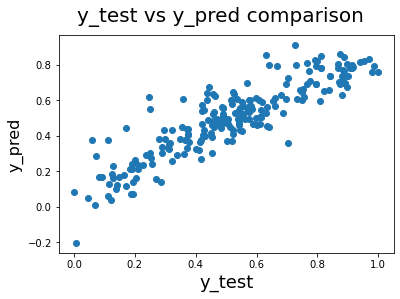

In [56]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=1)
fig.suptitle('y_test vs y_pred comparison', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [57]:
#R2 test

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7816014997205851

In [58]:
# n is number of rows in X
r2 = 0.7816014997205851
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7700515790327315

This seems a good model train set r2 value is .834 and test set r2 value is .782 

The top 3 predictor variables that influences the bike booking are:

Temperature (temp) - A coefficient value of ‘0.5404’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5454 units.

weathersit_L_Snow_Rain(Light Snow Rain Weather Condition) - A coefficient value of ‘-0.2835’ indicated that, a unit increase in Light Snow Rain Weather Condition variable decreases the bike hire numbers by 0.2835 units.

Year (yr) - A coefficient value of ‘0.2332’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2332 units.